## Install dependencies

In [2]:
import torch
import torchvision
import numpy as np
import cv2
from matplotlib import pyplot as plt
import datetime

In [2]:
! git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.17 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (11304/11304), done.


## Installing model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/user/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-23 Python-3.10.6 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Make detections with a dog image

In [11]:
image = 'raw_data/teacup-poodle.jpeg'

In [12]:
results = model(image)
results.print()

image 1/1: 512x768 1 dog, 1 teddy bear
Speed: 17.1ms pre-process, 134.8ms inference, 2.2ms NMS per image at shape (1, 3, 448, 640)


In [15]:
predictions = results.pred[0]
predictions
detected_labels = predictions[:,-1].cpu().numpy()
detected_labels

array([         16,          77], dtype=float32)

In [16]:
class_names = results.names
detected_class_names = [class_names[label] for label in detected_labels]

print(detected_class_names)

['dog', 'teddy bear']


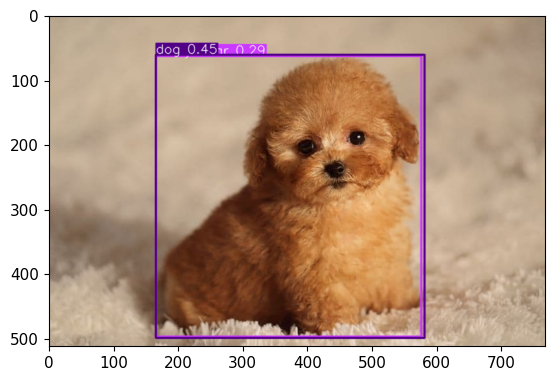

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        ...,
 
        [[180, 162, 140],
         [179, 161, 139],
         [180, 162, 140],
         ...,
         [189, 169, 145],
         [188, 168, 144],
         [187, 167, 143]],
 
        [[181, 163, 141],
         [178, 160, 138],
         [176, 158, 136],
         ...,
         [190, 170, 146],
         [189, 169, 145],
         [189, 169, 145]],
 
        [[186, 168, 146],
         [181, 163, 141],
         [177, 159, 137],
         ...,
         [193, 173, 149],
  

## Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid   # Unique identifier
import os
import time

In [1]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 1.73 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


### Go to labelImage directory and run in terminal "ipython labelImage.py"

In [20]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [22]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 100 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.6 torch-2.2.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/user/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-26 Python-3.10.6 torch-2.2.1 CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [5]:
img = 'raw_data/test_running_dog.jpeg'

In [6]:
results = model(img)
results.print()

image 1/1: 526x526 (no detections)
Speed: 26.0ms pre-process, 166.5ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)


In [7]:
predictions = results.pred[0]
detected_labels = predictions[:,-1].cpu().numpy()
detected_labels

array([], dtype=float32)

In [ ]:
class_names = results.names
detected_class_names = [class_names[label] for label in detected_labels]

print(detected_class_names)

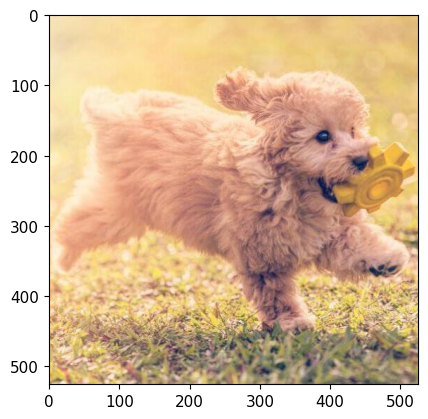

In [29]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
import datetime

log = []

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    #Extracting detected labels and detected time
    predictions = results.pred[0]
    detected_labels = predictions[:,-1].cpu().numpy()
    current_time = datetime.datetime.now()
    hour_minute = current_time.strftime("%H:%M:%S")

    class_names = results.names
    detected_class_names = [class_names[label] for label in detected_labels]
    if detected_class_names != []:
        for word in detected_class_names:
            log.append([word,hour_minute])

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

print(log)

2024-03-26 22:27:27.920 python[3583:65100] _TIPropertyValueIsValid called with 4 on nil context!
2024-03-26 22:27:27.920 python[3583:65100] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2024-03-26 22:27:27.920 python[3583:65100] Text input context does not respond to _valueForTIProperty:
2024-03-26 22:27:27.921 python[3583:65100] _TIPropertyValueIsValid called with 4 on nil context!
2024-03-26 22:27:27.921 python[3583:65100] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2024-03-26 22:27:27.921 python[3583:65100] Text input context does not respond to _valueForTIProperty:
2024-03-26 22:27:27.921 python[3583:65100] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_presentFunctionRowItemTextInputViewWithEndpoint:reply:) block performed very slowly (55.06 secs).
2024-03-26 22:27:27.921 python[3583:65100] IMKClient Stall detecte

[['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:34'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:35'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:36'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:37'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:27:38'], ['Dogs_trash', '22:

In [9]:
log = np.array(log)
log.shape

(42, 2)

In [8]:
combined_data = np.array([[event, time] for event, times in log.items() for time in times])
combined_data[:,0]

array(['Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_run', 'Dogs_sleep', 'Dogs_sleep', 'Dogs_sleep',
       'Dogs_sleep', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash',
       'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_trash',
       'Dogs_trash', 'Dogs_trash', 'Dogs_trash', 'Dogs_tr

In [12]:
import plotly.express as px
fig = px.scatter(x=log[:,1],y=log[:,0])
fig.show()